In [1]:
!pip install ultralytics
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [2]:
import os
import shutil
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [4]:
# download and unzip dataset
!kaggle datasets download -d siddharthkumarsah/plastic-bottles-image-dataset
!kaggle datasets download -d samuelayman/bottle

Dataset URL: https://www.kaggle.com/datasets/siddharthkumarsah/plastic-bottles-image-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
 95% 1.45G/1.53G [00:12<00:02, 36.4MB/s]
100% 1.53G/1.53G [00:12<00:00, 133MB/s] 
Dataset URL: https://www.kaggle.com/datasets/samuelayman/bottle
License(s): apache-2.0
 75% 109M/145M [00:00<00:00, 1.13GB/s]
100% 145M/145M [00:00<00:00, 997MB/s] 


In [5]:
# Create the base data directory
!mkdir -p data/plastic
!mkdir -p data/bottle

!unzip plastic-bottles-image-dataset.zip -d data/plastic
!unzip bottle.zip -d data/bottle

Streaming output truncated to the last 5000 lines.
  inflating: data/plastic/Plastic Bottle Image Dataset/train/labels/plastic-499-_JPG.rf.a8ca33f86459019053028cddb480bf5e.txt  
  inflating: data/plastic/Plastic Bottle Image Dataset/train/labels/plastic-500-_JPG.rf.65f4eac84fabe747bc5d015a12d23e13.txt  
  inflating: data/plastic/Plastic Bottle Image Dataset/train/labels/plastic-501-_JPG.rf.93358707c5b333124ed7c7eb843b2572.txt  
  inflating: data/plastic/Plastic Bottle Image Dataset/train/labels/plastic-510-_JPG.rf.7afcd2f8d5c688fb20b66b59517bd7e4.txt  
  inflating: data/plastic/Plastic Bottle Image Dataset/train/labels/plastic-511-_JPG.rf.4b3ef7de9f4b743f9858e6a54167e692.txt  
  inflating: data/plastic/Plastic Bottle Image Dataset/train/labels/plastic-512-_JPG.rf.78fb64d4620c4b2f933b17891c718968.txt  
  inflating: data/plastic/Plastic Bottle Image Dataset/train/labels/plastic-513-_JPG.rf.89bee0018fd9eaa3cdec37a16d65d954.txt  
  inflating: data/plastic/Plastic Bottle Image Dataset/train

In [7]:

# Final folders
os.makedirs('final_dataset/images/train', exist_ok=True)
os.makedirs('final_dataset/labels/train', exist_ok=True)

# Source paths
img_src = 'data/bottle/bottle'
lbl_src = os.path.join(img_src, 'labels')

# Move all image-label pairs to final_dataset
for fname in os.listdir(img_src):
    if fname.endswith(('.jpg', '.png', '.jpeg')):
        base = os.path.splitext(fname)[0]
        label_path = os.path.join(lbl_src, base + '.txt')

        # Check if label exists
        if os.path.exists(label_path):
            new_img_name = f'bottle_{fname}'
            new_lbl_name = f'bottle_{base}.txt'

            shutil.copy(os.path.join(img_src, fname), os.path.join('final_dataset/images/train', new_img_name))
            shutil.copy(label_path, os.path.join('final_dataset/labels/train', new_lbl_name))

print(" Bottle dataset organized and ready.")


 Bottle dataset organized and ready.


In [ ]:
# # delete a folder

# folder_path = "/content/data/plastic/Plastic Bottle Image Dataset/train"  # replace with your folder path
# shutil.rmtree(folder_path)

In [ ]:
# folder_path = "/content/final_dataset"  # replace with your folder path
# shutil.rmtree(folder_path)

In [6]:
# # Create final target folders if not already created
os.makedirs('final_dataset/images/train', exist_ok=True)
os.makedirs('final_dataset/labels/train', exist_ok=True)

# Use only reliable folders
plastic_base_dir = 'data/plastic/Plastic Bottle Image Dataset'
subfolders = ['train', 'valid']  # skip 'test'

for sub in subfolders:
    plastic_img_dir = os.path.join(plastic_base_dir, sub, 'images')
    plastic_lbl_dir = os.path.join(plastic_base_dir, sub, 'labels')

    if not os.path.exists(plastic_img_dir) or not os.path.exists(plastic_lbl_dir):
        print(f"Skipping missing folder: {sub}")
        continue

    for fname in os.listdir(plastic_img_dir):
        if fname.endswith(('.jpg', '.jpeg', '.png')):
            base = os.path.splitext(fname)[0]
            label_path = os.path.join(plastic_lbl_dir, base + '.txt')

            if os.path.exists(label_path):
                new_img_name = f'plastic_{sub}_{fname}'
                new_lbl_name = f'plastic_{sub}_{base}.txt'

                shutil.copy(os.path.join(plastic_img_dir, fname), f'final_dataset/images/train/{new_img_name}')
                shutil.copy(label_path, f'final_dataset/labels/train/{new_lbl_name}')

print("Plastic dataset (train & valid only) safely merged into final_dataset.")


Plastic dataset (train & valid only) safely merged into final_dataset.


In [8]:

# Paths
img_dir = 'final_dataset/images/train'
lbl_dir = 'final_dataset/labels/train'
val_img_dir = 'final_dataset/images/val'
val_lbl_dir = 'final_dataset/labels/val'

# Create val folders
os.makedirs(val_img_dir, exist_ok=True)
os.makedirs(val_lbl_dir, exist_ok=True)

# List and split
image_files = [f for f in os.listdir(img_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
train_files, val_files = train_test_split(image_files, test_size=0.2, random_state=42)

# Move validation files
for f in val_files:
    base = os.path.splitext(f)[0]
    label = f"{base}.txt"
    shutil.move(os.path.join(img_dir, f), os.path.join(val_img_dir, f))
    shutil.move(os.path.join(lbl_dir, label), os.path.join(val_lbl_dir, label))

print("Split completed: 80% train, 20% val")


Split completed: 80% train, 20% val


In [9]:
yaml_content = """
train: final_dataset/images/train
val: final_dataset/images/val

names:
  0: bottle
"""

with open("bottle_data.yaml", "w") as f:
    f.write(yaml_content.strip())

print("YOLOv8 config file 'bottle_data.yaml' created.")

YOLOv8 config file 'bottle_data.yaml' created.


In [10]:
!ls -l bottle_data.yaml

-rw-r--r-- 1 root root 83 Jul 10 17:34 bottle_data.yaml


In [11]:
with open("bottle_data.yaml", "r") as f:
    print(f.read())

train: final_dataset/images/train
val: final_dataset/images/val

names:
  0: bottle


In [12]:
train_dir = 'final_dataset/images/train'
val_dir = 'final_dataset/images/val'

# Count images (files ending with .jpg, .jpeg, or .png)
train_images = [f for f in os.listdir(train_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
val_images = [f for f in os.listdir(val_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

print(f" Training images: {len(train_images)}")
print(f" Validation images: {len(val_images)}")


 Training images: 3480
 Validation images: 871


In [13]:
# Load a pre-trained model
model = YOLO('yolov8n.pt')  # or try 'yolov8s.pt' for better accuracy

# Start training
model.train(
    data='bottle_data.yaml',     # Path to your dataset config
    epochs=10,                   # Number of training epochs
    name='bottle_detector',      # Experiment name

)

100%|██████████| 6.25M/6.25M [00:00<00:00, 86.8MB/s]


Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=bottle_data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=bottle_detector, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=T

100%|██████████| 755k/755k [00:00<00:00, 26.2MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 85.9MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1519.8±1073.5 MB/s, size: 458.6 KB)


train: Scanning /content/final_dataset/labels/train... 3480 images, 0 backgrounds, 808 corrupt: 100%|██████████| 3480/3480 [00:01<00:00, 2627.79it/s]

train: /content/final_dataset/images/train/bottle_10_1.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 1. Possible class labels are 0-0
train: /content/final_dataset/images/train/bottle_10_10.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 1. Possible class labels are 0-0
train: /content/final_dataset/images/train/bottle_10_1000.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 1. Possible class labels are 0-0
train: /content/final_dataset/images/train/bottle_10_1001.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 1. Possible class labels are 0-0
train: /content/final_dataset/images/train/bottle_10_1002.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 1. Possible class labels are 0-0
train: /content/final_dataset/images/train/bottle_10_1003.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 1. Possible class labels

train: New cache created: /content/final_dataset/labels/train.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 146, len(boxes) = 3794. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 898.2±1116.4 MB/s, size: 588.8 KB)


val: Scanning /content/final_dataset/labels/val... 871 images, 0 backgrounds, 194 corrupt: 100%|██████████| 871/871 [00:00<00:00, 877.17it/s]

val: /content/final_dataset/images/val/bottle_10_100.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/final_dataset/images/val/bottle_10_1031.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/final_dataset/images/val/bottle_10_1043.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/final_dataset/images/val/bottle_10_1047.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/final_dataset/images/val/bottle_10_1050.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/final_dataset/images/val/bottle_10_1051.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 1. Possible class labels are 0-0
val: /conte

val: New cache created: /content/final_dataset/labels/val.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 34, len(boxes) = 936. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/bottle_detector/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/bottle_detector
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE

       1/10      2.02G      1.592      2.596        1.8         23        640: 100%|██████████| 167/167 [01:42<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:14<00:00,  1.56it/s]


                   all        677        936      0.483      0.393      0.327      0.181

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.79G      1.761      2.171      1.931         19        640: 100%|██████████| 167/167 [01:37<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:13<00:00,  1.68it/s]


                   all        677        936      0.436      0.363      0.276       0.14

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10       2.8G      1.827      2.021      1.985         17        640: 100%|██████████| 167/167 [01:35<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:12<00:00,  1.70it/s]


                   all        677        936      0.389      0.339      0.259       0.14

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.82G      1.731      1.854      1.895         25        640: 100%|██████████| 167/167 [01:35<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:13<00:00,  1.63it/s]


                   all        677        936      0.494      0.409      0.322      0.181

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.84G      1.648      1.769      1.849         16        640: 100%|██████████| 167/167 [01:36<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:12<00:00,  1.73it/s]


                   all        677        936      0.597      0.493      0.425      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.86G      1.557       1.64      1.761         27        640: 100%|██████████| 167/167 [01:38<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:13<00:00,  1.67it/s]


                   all        677        936      0.586      0.534      0.457      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.87G      1.485      1.533      1.714         18        640: 100%|██████████| 167/167 [01:36<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:13<00:00,  1.64it/s]


                   all        677        936      0.611      0.518      0.464      0.311

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.89G      1.408      1.482      1.644         19        640: 100%|██████████| 167/167 [01:38<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:13<00:00,  1.64it/s]


                   all        677        936      0.652      0.502      0.474      0.318

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10       2.9G      1.386      1.424      1.613         20        640: 100%|██████████| 167/167 [01:36<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:13<00:00,  1.68it/s]


                   all        677        936      0.651      0.546        0.5      0.344

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.92G      1.323       1.36      1.567         23        640: 100%|██████████| 167/167 [01:40<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:13<00:00,  1.66it/s]


                   all        677        936       0.69      0.545      0.506      0.348

10 epochs completed in 0.311 hours.
Optimizer stripped from runs/detect/bottle_detector/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/bottle_detector/weights/best.pt, 6.2MB

Validating runs/detect/bottle_detector/weights/best.pt...
Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:18<00:00,  1.19it/s]


                   all        677        936      0.689      0.545      0.506      0.348
Speed: 0.3ms preprocess, 2.2ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/bottle_detector


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a794aabd250>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [14]:
# showing accuracy and precision
results = model.val()

Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1474.3±490.5 MB/s, size: 46.1 KB)


val: Scanning /content/final_dataset/labels/val.cache... 871 images, 0 backgrounds, 194 corrupt: 100%|██████████| 871/871 [00:00<?, ?it/s]

val: /content/final_dataset/images/val/bottle_10_100.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/final_dataset/images/val/bottle_10_1031.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/final_dataset/images/val/bottle_10_1043.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/final_dataset/images/val/bottle_10_1047.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/final_dataset/images/val/bottle_10_1050.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/final_dataset/images/val/bottle_10_1051.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 1. Possible class labels are 0-0
val: /conte


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:26<00:00,  1.62it/s]


                   all        677        936      0.691      0.545      0.506      0.348
Speed: 0.9ms preprocess, 5.7ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/bottle_detector2


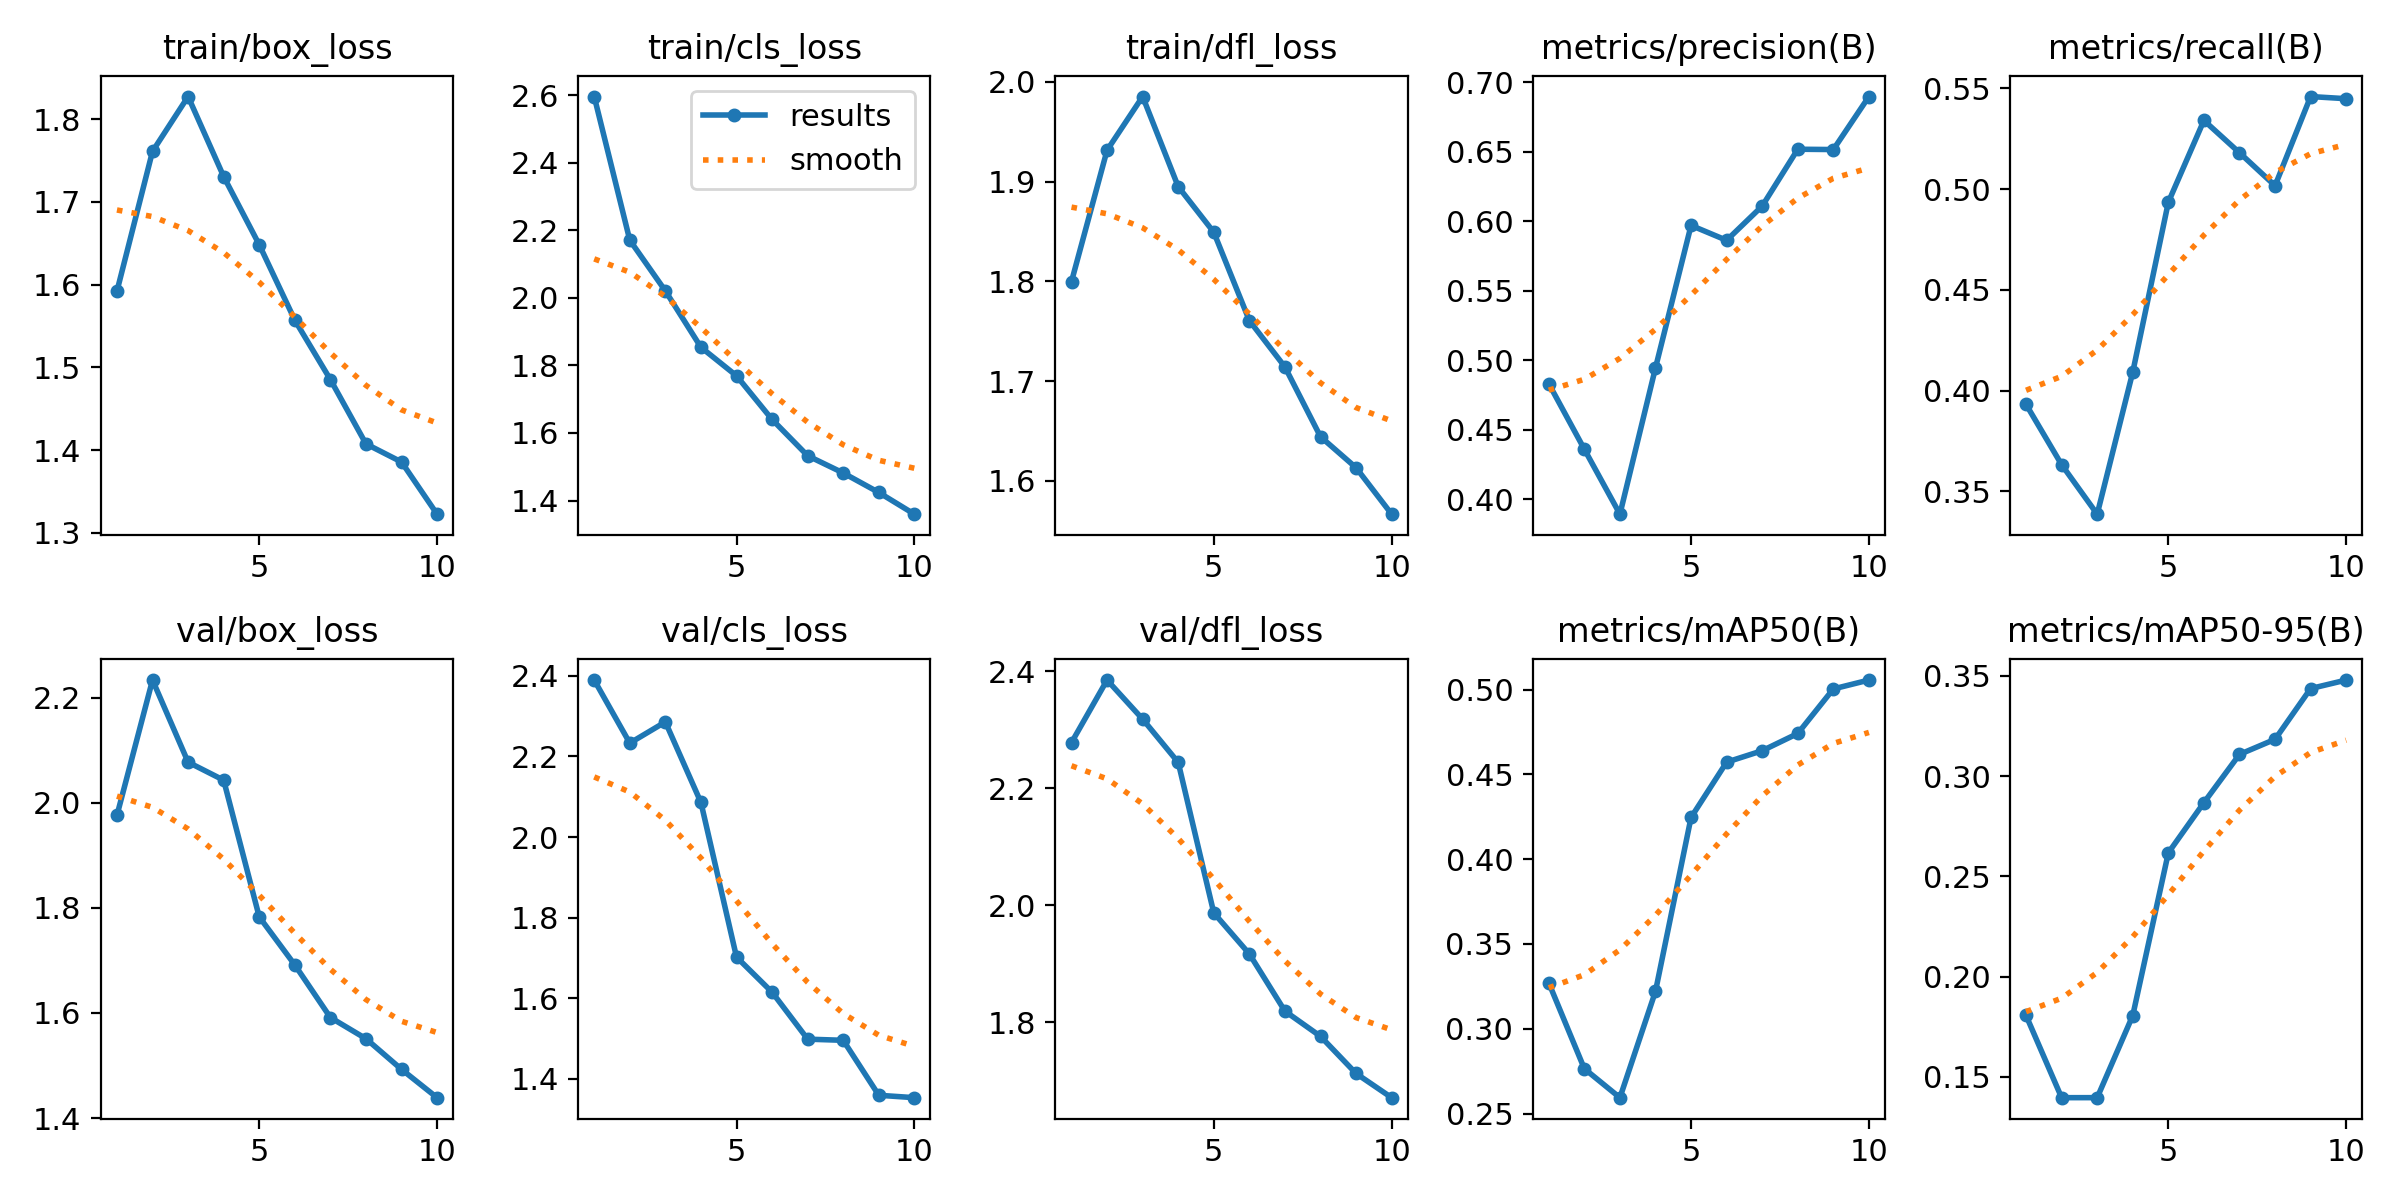

In [15]:
from IPython.display import Image
Image(filename='runs/detect/bottle_detector/results.png')

In [3]:
# Run prediction on  validation images
# results = model.predict(source='final_dataset/images/val', save=True, imgsz=640)
# sample_images = val_images[:500]  # only 500 images
# result = model.predict(source=sample_images, save=True, imgsz=640)
import os
from ultralytics import YOLO

# Load the model
model = YOLO('runs/detect/bottle_detector/weights/best.pt')  # adjust path as needed

# Get full paths of the first 500 images in val folder
val_dir = 'final_dataset/images/val'
val_images = sorted([
    os.path.join(val_dir, f)
    for f in os.listdir(val_dir)
    if f.endswith(('.jpg', '.jpeg', '.png'))
])[:500]

# Run prediction
results = model.predict(source=val_images, save=True, imgsz=640)



0: 640x640 1 bottle, 3.5ms
1: 640x640 1 bottle, 3.5ms
2: 640x640 (no detections), 3.5ms
3: 640x640 (no detections), 3.5ms
4: 640x640 (no detections), 3.5ms
5: 640x640 (no detections), 3.5ms
6: 640x640 (no detections), 3.5ms
7: 640x640 1 bottle, 3.5ms
8: 640x640 1 bottle, 3.5ms
9: 640x640 1 bottle, 3.5ms
10: 640x640 2 bottles, 3.5ms
11: 640x640 2 bottles, 3.5ms
12: 640x640 1 bottle, 3.5ms
13: 640x640 (no detections), 3.5ms
14: 640x640 (no detections), 3.5ms
15: 640x640 (no detections), 3.5ms
16: 640x640 (no detections), 3.5ms
17: 640x640 (no detections), 3.5ms
18: 640x640 (no detections), 3.5ms
19: 640x640 (no detections), 3.5ms
20: 640x640 (no detections), 3.5ms
21: 640x640 (no detections), 3.5ms
22: 640x640 (no detections), 3.5ms
23: 640x640 (no detections), 3.5ms
24: 640x640 (no detections), 3.5ms
25: 640x640 (no detections), 3.5ms
26: 640x640 1 bottle, 3.5ms
27: 640x640 (no detections), 3.5ms
28: 640x640 2 bottles, 3.5ms
29: 640x640 (no detections), 3.5ms
30: 640x640 1 bottle, 3.5m

In [7]:
pred_dir = 'runs/detect/bottle_detector2'
print(os.listdir(pred_dir))

['confusion_matrix.png', 'val_batch1_labels.jpg', 'confusion_matrix_normalized.png', 'val_batch2_labels.jpg', 'val_batch1_pred.jpg', 'BoxPR_curve.png', 'BoxP_curve.png', 'val_batch0_pred.jpg', 'BoxF1_curve.png', 'val_batch2_pred.jpg', 'BoxR_curve.png', 'val_batch0_labels.jpg']


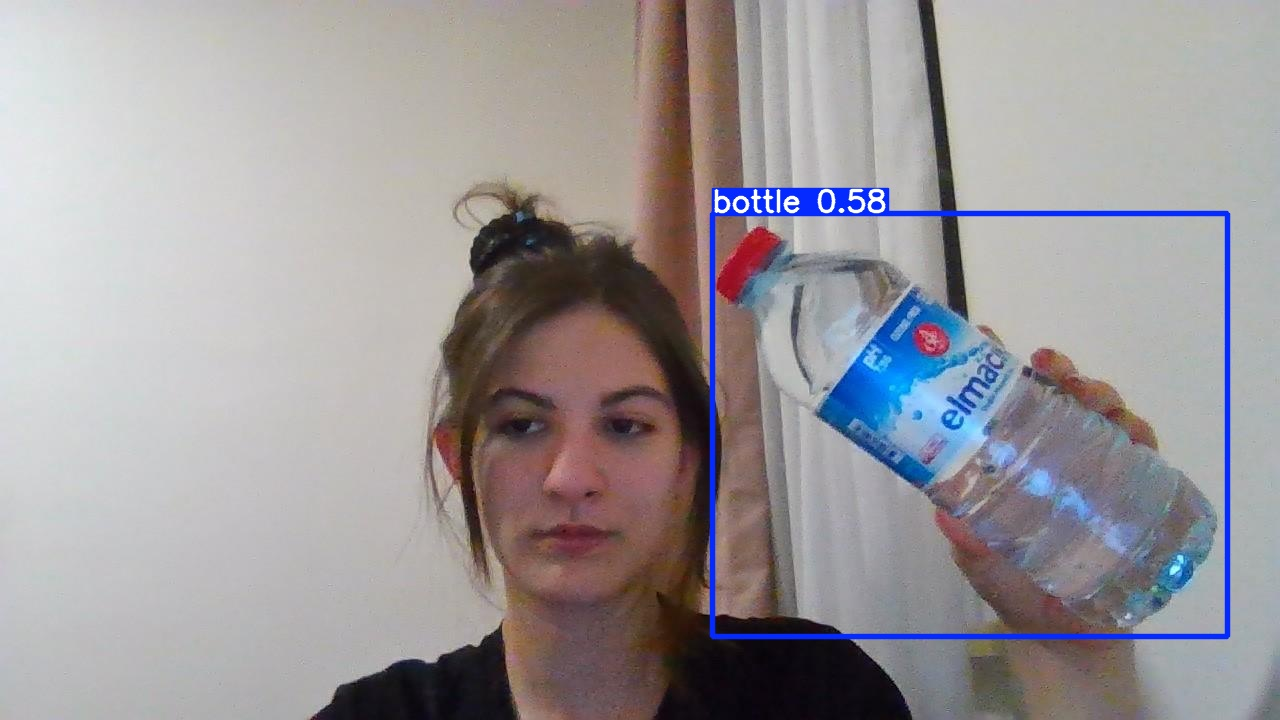

In [8]:
import os
from IPython.display import Image

pred_dir = 'runs/detect/predict'

# List only actual image files (exclude .txt, .png, etc.)
pred_images = [f for f in os.listdir(pred_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Show the first prediction image
Image(filename=os.path.join(pred_dir, pred_images[0]))


In [14]:
import sys
import platform
import torch
import numpy
import matplotlib
import cv2
import sklearn
import ultralytics
import os

print(f"Python version      : {platform.python_version()}")  # e.g., 3.10.12
print(f"Ultralytics YOLOv8  : {ultralytics.__version__}")     # e.g., 8.0.178
print(f"Torch (PyTorch)     : {torch.__version__}")           # e.g., 2.1.0+cu118
print(f"CUDA available      : {torch.cuda.is_available()}")
print(f"NumPy               : {numpy.__version__}")
print(f"OpenCV              : {cv2.__version__}")
print(f"Matplotlib          : {matplotlib.__version__}")
print(f"scikit-learn        : {sklearn.__version__}")
print(f"OS Platform         : {platform.system()} {platform.release()} ({os.name})")
print(f"Torch (PyTorch)     : {torch.__version__}")

Python version      : 3.11.13
Ultralytics YOLOv8  : 8.3.163
Torch (PyTorch)     : 2.6.0+cu124
CUDA available      : True
NumPy               : 2.0.2
OpenCV              : 4.12.0
Matplotlib          : 3.10.0
scikit-learn        : 1.6.1
OS Platform         : Linux 6.1.123+ (posix)
Torch (PyTorch)     : 2.6.0+cu124
